In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
np.random.seed(42)
X = np.linspace(-1, 1, 50)
y = X**3 + np.random.normal(0, 0.5, X.shape[0])

In [16]:
X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [17]:
X_train, X_test = X[:30], X[30:]
y_train, y_test = y[:30], y[30:]

In [18]:
class OverfittingNN(nn.Module):
    def __init__(self):
        super(OverfittingNN, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = OverfittingNN()


Epoch [100/500], Train Loss: 0.1213, Test Loss: 0.4526
Epoch [200/500], Train Loss: 0.0953, Test Loss: 0.7524
Epoch [300/500], Train Loss: 0.0639, Test Loss: 2.1955
Epoch [400/500], Train Loss: 0.0541, Test Loss: 3.2857
Epoch [500/500], Train Loss: 0.0326, Test Loss: 4.7945


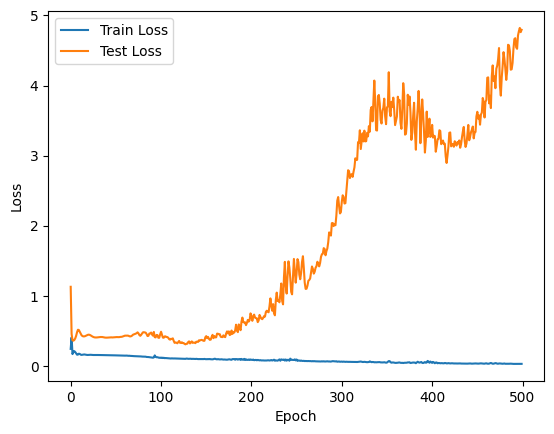

In [19]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 500
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        test_output = model(X_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot the training and test losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


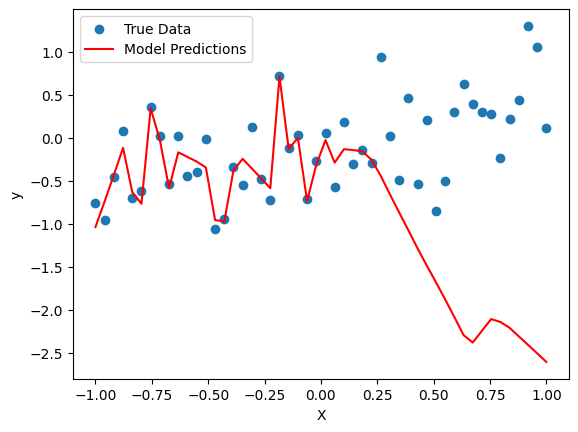

In [20]:
# Plot predictions
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()

plt.scatter(X.numpy(), y.numpy(), label='True Data')
plt.plot(X.numpy(), predictions, label='Model Predictions', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Overfitting occurred

In [21]:
# Lets implement Dropouts

In [22]:
class DropoutNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,128)
        self.l2 = nn.Linear(128,128)
        self.l3 = nn.Linear(128,128)
        self.l4 = nn.Linear(128,1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.dropout(x)
        x = self.relu(self.l2(x))
        x = self.dropout(x)
        x = self.relu(self.l3(x))
        x = self.dropout(x)
        x = self.l4(x)
        
        return x
            

In [23]:
model_with_dropout = DropoutNN()

Epoch [100/500], Train Loss: 0.1935, Test Loss: 0.4887
Epoch [200/500], Train Loss: 0.1522, Test Loss: 0.4754
Epoch [300/500], Train Loss: 0.1676, Test Loss: 0.4944
Epoch [400/500], Train Loss: 0.1691, Test Loss: 0.4591
Epoch [500/500], Train Loss: 0.1664, Test Loss: 0.4811


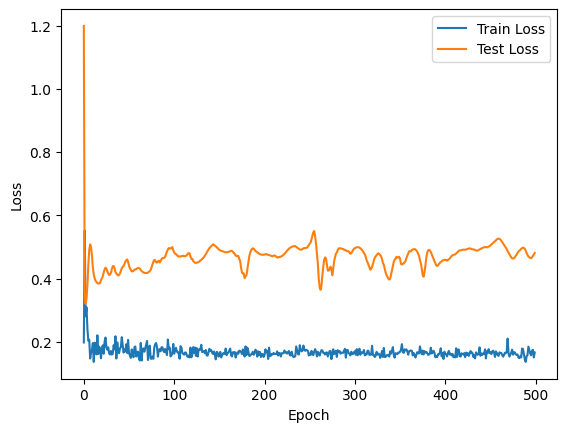

In [24]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.01)

# Training the model
epochs = 500
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_with_dropout.train()
    optimizer.zero_grad()
    output = model_with_dropout(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    # Evaluate on test data
    model_with_dropout.eval()
    with torch.no_grad():
        test_output = model_with_dropout(X_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot the training and test losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
